## Import Libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv("titanic.csv")
df.head() #several missing values!

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [63]:
df.shape

(1310, 14)

In [64]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [65]:
df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [66]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [67]:
df.duplicated().sum()

0

In [68]:
df.duplicated('name').sum()

2

In [69]:
duplicate = df[df.duplicated('name')]
duplicate

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
726,3.0,0.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
925,3.0,0.0,"Kelly, Mr. James",male,44.0,0.0,0.0,363592,8.0500,NaN,S,NaN,NaN,NaN


In [70]:
df.drop(['cabin', 'body','boat','home.dest','name','ticket'], axis = 1, inplace = True)

In [71]:
df.shape

(1310, 8)

In [72]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
...,...,...,...,...,...,...,...,...
1305,3.0,0.0,female,NaN,1.0,0.0,14.4542,C
1306,3.0,0.0,male,26.5000,0.0,0.0,7.2250,C
1307,3.0,0.0,male,27.0000,0.0,0.0,7.2250,C
1308,3.0,0.0,male,29.0000,0.0,0.0,7.8750,S


In [73]:
df['age'] = df['age'].fillna(df['age'].mean())

In [74]:
df.isnull().sum()

pclass      1
survived    1
sex         1
age         0
sibsp       1
parch       1
fare        2
embarked    3
dtype: int64

In [75]:
newdf = df.dropna()

In [76]:
newdf.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [77]:
newdf.shape

(1306, 8)

In [78]:
newdf.nunique()

pclass        3
survived      2
sex           2
age          98
sibsp         7
parch         8
fare        280
embarked      3
dtype: int64

In [79]:
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1306.0,2.296325,0.837037,1.0000,2.0000,3.000000,3.000,3.0000
survived,1306.0,0.381317,0.485896,0.0000,0.0000,0.000000,1.000,1.0000
age,1306.0,29.826880,12.837289,0.1667,22.0000,29.881135,35.000,80.0000
sibsp,1306.0,0.500000,1.042580,0.0000,0.0000,0.000000,1.000,8.0000
parch,1306.0,0.385911,0.866357,0.0000,0.0000,0.000000,0.000,9.0000
fare,1306.0,33.223956,51.765986,0.0000,7.8958,14.454200,31.275,512.3292


In [80]:
newdf.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pclass,1306.0,NaN,NaN,NaN,2.296325,0.837037,1.0,2.0,3.0,3.0,3.0
survived,1306.0,NaN,NaN,NaN,0.381317,0.485896,0.0,0.0,0.0,1.0,1.0
sex,1306,2,male,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1306.0,NaN,NaN,NaN,29.82688,12.837289,0.1667,22.0,29.881135,35.0,80.0
sibsp,1306.0,NaN,NaN,NaN,0.5,1.04258,0.0,0.0,0.0,1.0,8.0
parch,1306.0,NaN,NaN,NaN,0.385911,0.866357,0.0,0.0,0.0,0.0,9.0
fare,1306.0,NaN,NaN,NaN,33.223956,51.765986,0.0,7.8958,14.4542,31.275,512.3292
embarked,1306,3,S,913,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
newdf['embarked'].value_counts()

S    913
C    270
Q    123
Name: embarked, dtype: int64

In [82]:
newdf.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


In [83]:
cat_cols= newdf.select_dtypes(include=['object']).columns
num_cols = newdf.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['sex', 'embarked'], dtype='object')
Numerical Variables:
['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']


pclass
Skew : -0.6


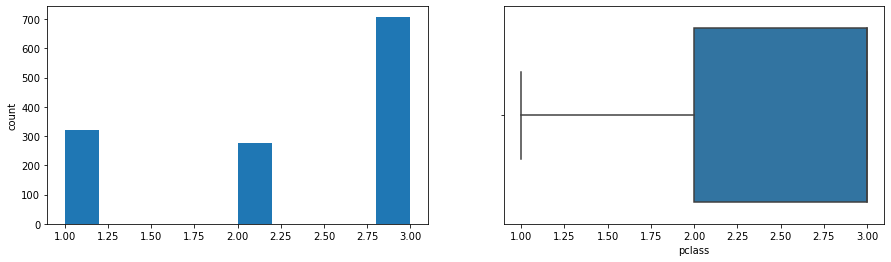

survived
Skew : 0.49


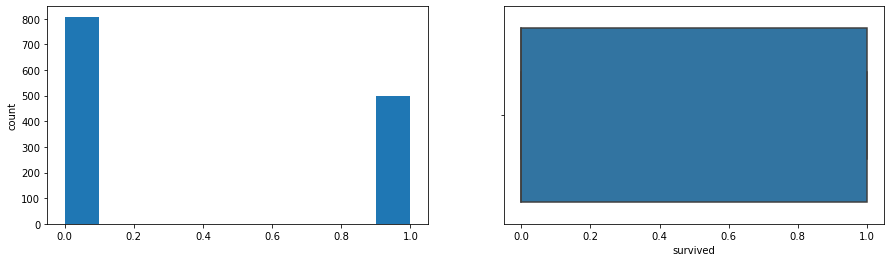

age
Skew : 0.45


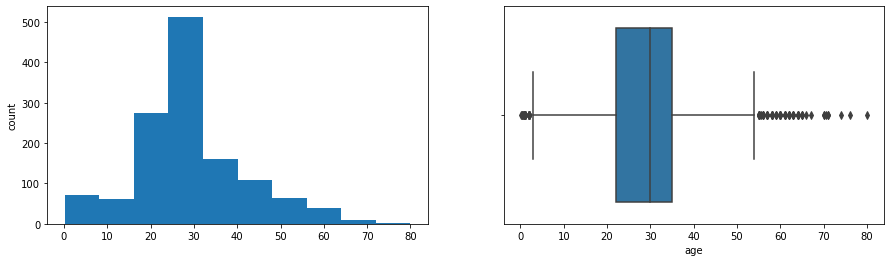

sibsp
Skew : 3.84


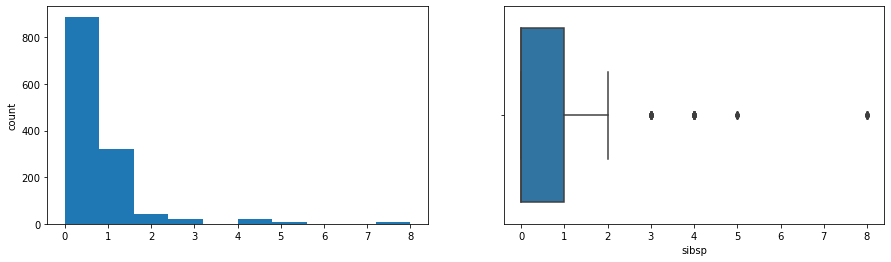

parch
Skew : 3.66


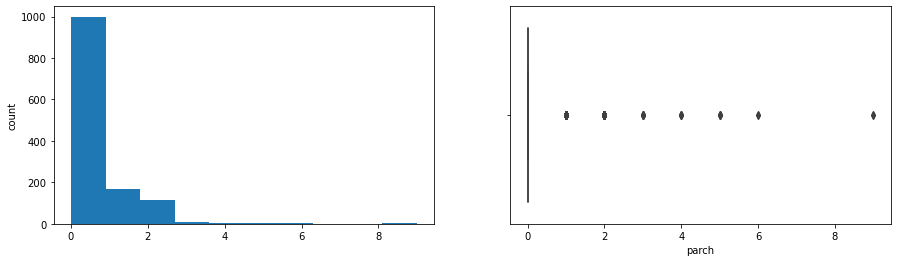

fare
Skew : 4.38


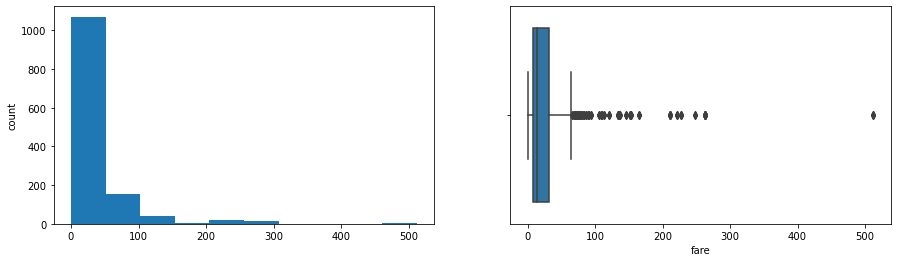

In [84]:
for col in num_cols:
    print(col)
    print('Skew :', round(newdf[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    newdf[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=newdf[col])
    plt.show()

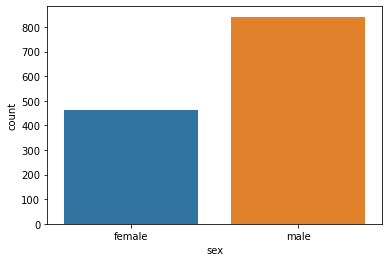

In [85]:
sns.countplot(x='sex',data=newdf)
plt.show()

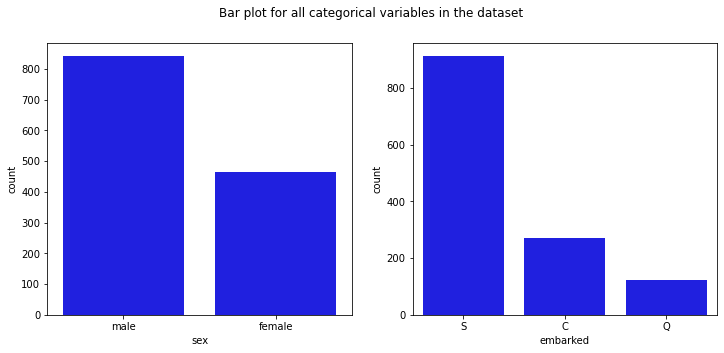

In [86]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0], x = 'sex', data = newdf,  color = 'blue',
              order = newdf['sex'].value_counts().index);
sns.countplot(ax = axes[1], x = 'embarked', data = newdf, color = 'blue', 
              order = newdf['embarked'].value_counts().index);


<Figure size 720x720 with 0 Axes>

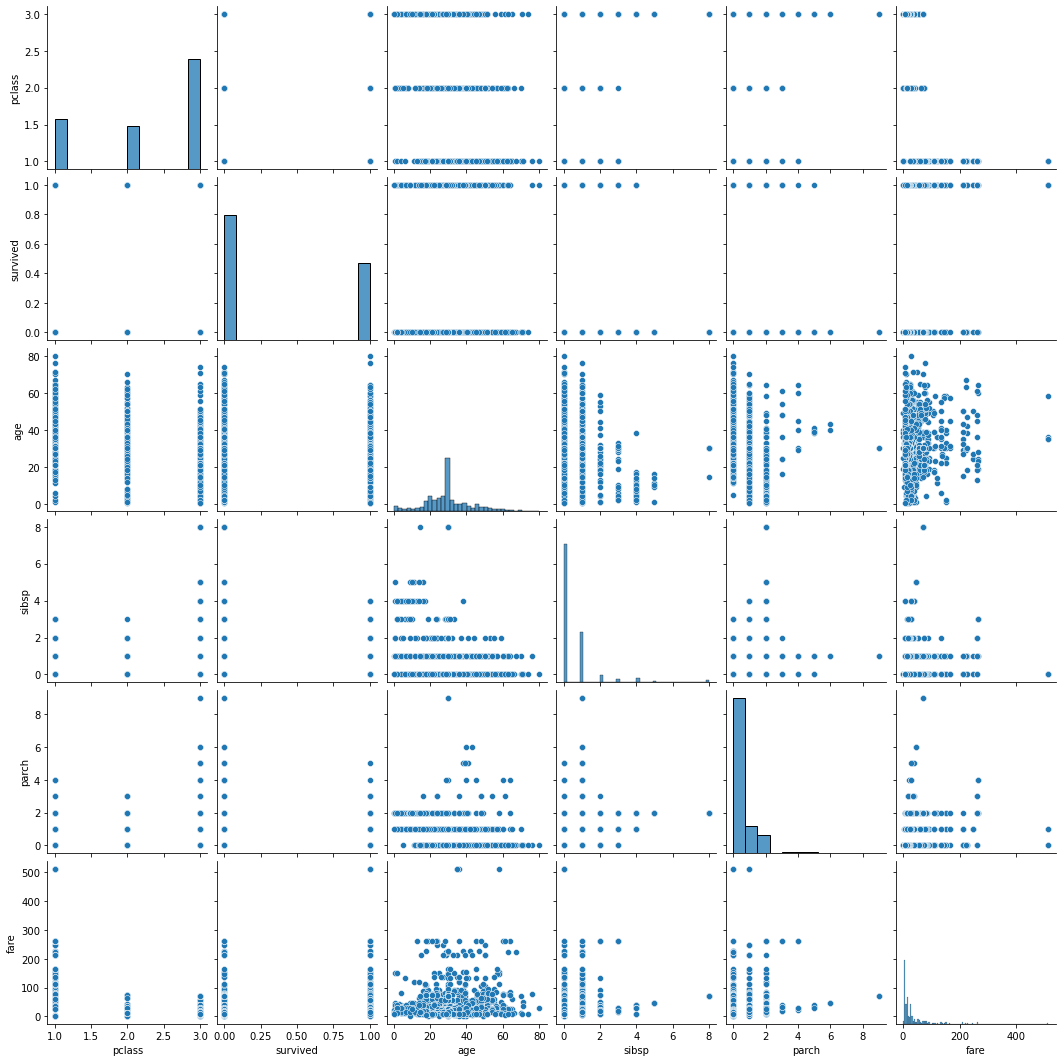

In [87]:
plt.figure(figsize=(10,10))
sns.pairplot(data=newdf)
plt.show()

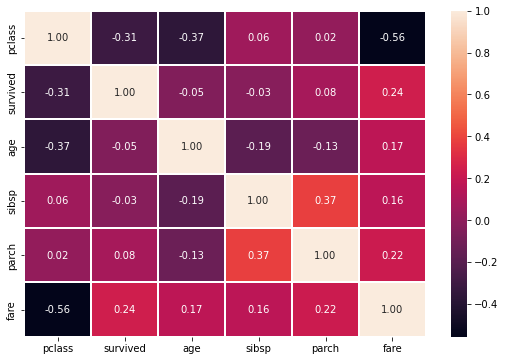

In [88]:
corr = newdf.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [89]:
from pandas_profiling import ProfileReport

In [90]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
newdf.replace(['female', 'male'], [0, 1], inplace=True)

In [92]:
le = LabelEncoder()

columns = ['embarked']

for col in columns:
    le.fit(newdf[col])
    newdf[col] = le.transform(newdf[col])
    
newdf.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,2
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,2
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,2
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,2
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,2


In [93]:
newdf

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.000000,0.0,0.0,211.3375,2
1,1.0,1.0,1,0.916700,1.0,2.0,151.5500,2
2,1.0,0.0,0,2.000000,1.0,2.0,151.5500,2
3,1.0,0.0,1,30.000000,1.0,2.0,151.5500,2
4,1.0,0.0,0,25.000000,1.0,2.0,151.5500,2
...,...,...,...,...,...,...,...,...
1304,3.0,0.0,0,14.500000,1.0,0.0,14.4542,0
1305,3.0,0.0,0,29.881135,1.0,0.0,14.4542,0
1306,3.0,0.0,1,26.500000,0.0,0.0,7.2250,0
1307,3.0,0.0,1,27.000000,0.0,0.0,7.2250,0


In [94]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   sex       1306 non-null   int64  
 3   age       1306 non-null   float64
 4   sibsp     1306 non-null   float64
 5   parch     1306 non-null   float64
 6   fare      1306 non-null   float64
 7   embarked  1306 non-null   int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 119.0 KB


## Split Data

In [95]:
X = newdf.drop("survived" , axis=1)
y = newdf.pop("survived")

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [97]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [98]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))



0.9715536105032823
0.7755102040816326


## Visualizing the Decision Tree

In [99]:
train_char_label = ['1.0', '0.0']
survived_File = open('survived.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=survived_File, feature_names = list(X_train), class_names = list(train_char_label))
survived_File.close()

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

1. pasting the contents of that file at  http://webgraphviz.com/ (or)
2. generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)


In [100]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng survived_tree.dot -o survived_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("survived_tree.png"))

    

system command returning error: 1


## Reducing over fitting (Regularization)

In [101]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8074398249452954
0.8290816326530612


In [102]:
train_char_label = ['1.0', '0.0']
survived_Tree_FileR = open('survived_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=survived_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
survived_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng survived_treeR.dot -o survived_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("survived_treeR.png"))



system command returning error: 1


In [124]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

               Imp
sex       0.615953
pclass    0.237507
age       0.066222
fare      0.043517
sibsp     0.036801
parch     0.000000
embarked  0.000000


0.8290816326530612


<AxesSubplot:>

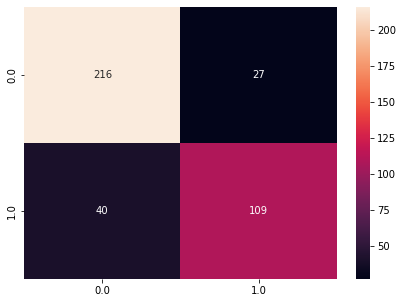

In [104]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0.0","1.0"]],
                  columns = [i for i in ["0.0","1.0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [105]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       256
         1.0       0.73      0.80      0.76       136

    accuracy                           0.83       392
   macro avg       0.81      0.82      0.82       392
weighted avg       0.83      0.83      0.83       392



#                             Ensemble Learning - Bagging

In [106]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=40,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


0.8214285714285714


<AxesSubplot:>

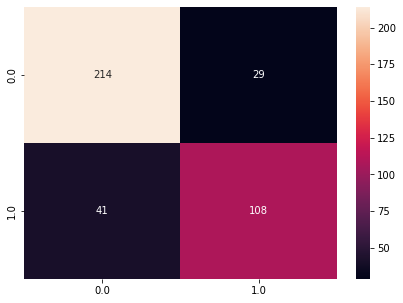

In [107]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0.0","1.0"]],
                  columns = [i for i in ["0.0","1.0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [108]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       255
         1.0       0.72      0.79      0.76       137

    accuracy                           0.82       392
   macro avg       0.80      0.81      0.81       392
weighted avg       0.83      0.82      0.82       392



# Ensemble Learning - AdaBoosting

In [109]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


0.8163265306122449


<AxesSubplot:>

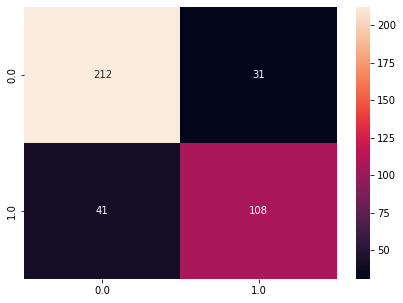

In [110]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0.0","1.0"]],
                  columns = [i for i in ["0.0","1.0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [111]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85       253
         1.0       0.72      0.78      0.75       139

    accuracy                           0.82       392
   macro avg       0.80      0.81      0.80       392
weighted avg       0.82      0.82      0.82       392



#                     Ensemble Learning - GradientBoost

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 40,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.8341836734693877


<AxesSubplot:>

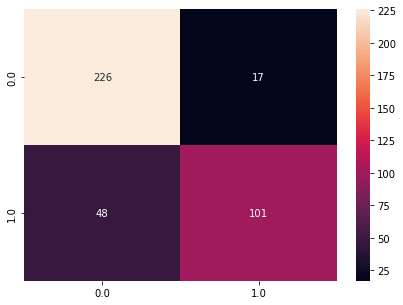

In [113]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0.0","1.0"]],
                  columns = [i for i in ["0.0","1.0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [114]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       274
         1.0       0.68      0.86      0.76       118

    accuracy                           0.83       392
   macro avg       0.80      0.84      0.82       392
weighted avg       0.85      0.83      0.84       392



# Ensemble RandomForest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100, random_state=1,max_features=4, max_depth= 10)
rfcl = rfcl.fit(X_train, y_train)


0.8341836734693877


<AxesSubplot:>

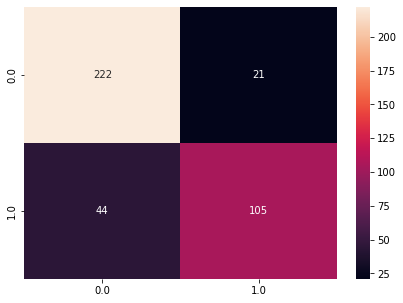

In [116]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0.0","1.0"]],
                  columns = [i for i in ["0.0","1.0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [117]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       266
         1.0       0.70      0.83      0.76       126

    accuracy                           0.83       392
   macro avg       0.81      0.83      0.82       392
weighted avg       0.85      0.83      0.84       392



In [119]:
y_test.value_counts()

0.0    243
1.0    149
Name: survived, dtype: int64

In [120]:
y_train.value_counts()

0.0    565
1.0    349
Name: survived, dtype: int64

In [123]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

               Imp
sex       0.303431
fare      0.274655
age       0.208114
pclass    0.101694
sibsp     0.042943
parch     0.035512
embarked  0.033652
